<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/H2O_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Molecule (H₂O)**

In [ ]:
!pip install pyscf matplotlib geometric openfermion openfermionpyscf pennylane cirq openfermioncirq -q

In [2]:
# Define molecule
from pyscf import gto
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''

[Water molecule](https://en.m.wikipedia.org/wiki/Water) (H₂O) has a bent (or V-shaped) molecular geometry

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/H2O_2D_labelled.svg/320px-H2O_2D_labelled.svg.png)

### **Emission and Absorption Spectra**

converged SCF energy = -74.9629466565387


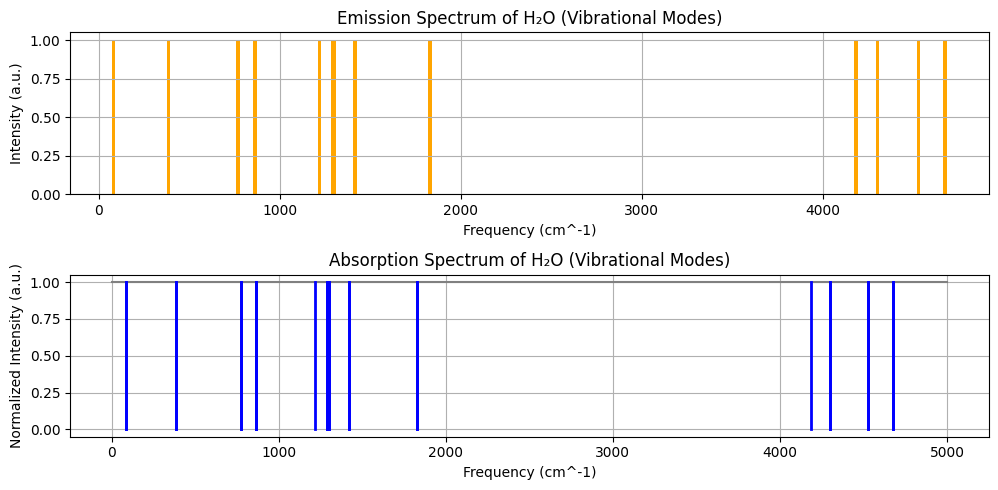

In [3]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol.atom = mol.atom
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Simulate and plot both emission and absorption spectra
# Emission Spectrum (peaks at specific frequencies)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # First plot: Emission Spectrum
plt.bar(frequencies, height=1.0, width=20.0, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Emission Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

# Absorption Spectrum (dips at specific frequencies)
plt.subplot(2, 1, 2)  # Second plot: Absorption Spectrum
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000), color='gray')  # Baseline at 1.0 intensity
for freq in frequencies:
    plt.plot([freq, freq], [1.0, 0.0], color='blue', lw=2)  # Draw vertical absorption dips
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Normalized Intensity (a.u.)')
plt.title('Absorption Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Vibrational Frequencies**

converged SCF energy = -74.9629466565387


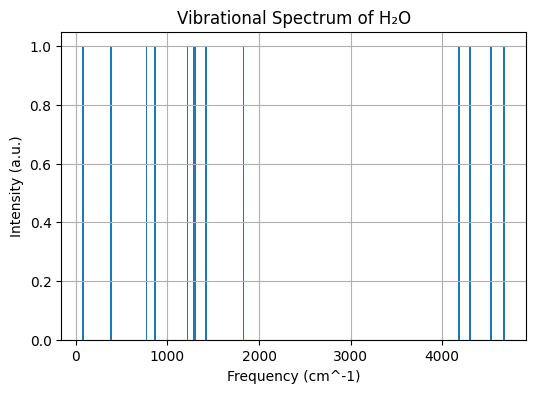

Vibrational frequencies (in cm^-1):
1218.90 cm^-1
4184.92 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4676.28 cm^-1
82.16 cm^-1
861.89 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1
1417.23 cm^-1
385.67 cm^-1
1290.59 cm^-1
4676.28 cm^-1
82.16 cm^-1
861.89 cm^-1
1417.23 cm^-1
385.67 cm^-1
1290.59 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol.atom = mol.atom
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
# Hessian matrix of second derivatives of energy with respect to nuclear displacements is computed
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
# Vvibrational frequencies are obtained by diagonalizing Hessian matrix and converting results from atomic units to cm⁻¹
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Plot the vibrational spectrum
plt.figure(figsize=(6, 4))
plt.bar(frequencies, height=1.0, width=20.0)
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Vibrational Spectrum of H₂O')
plt.grid(True)
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")

### **Ground State with HF-SCF**

converged SCF energy = -76.0267936449739


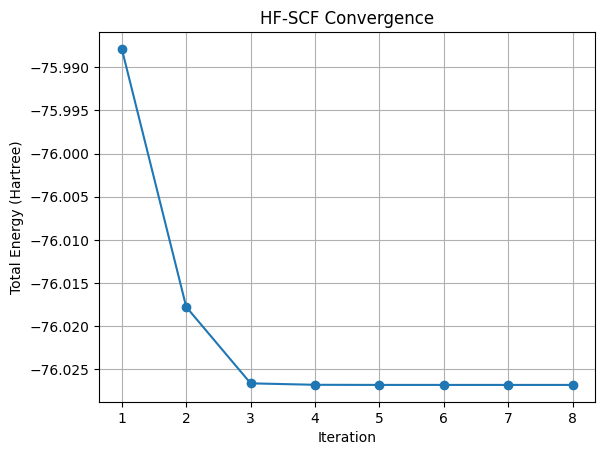

HF-SCF energy for H2O: -76.02679364497389 Hartree


In [ ]:
# Hartree-Fock SCF (Slater Determinant)
# First, ensure you have the PySCF package installed
from pyscf import gto, scf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation for a closed-shell system (H₂O)
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
# (callback function captures energy values at each iteration to track the convergence process)
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for H2O: {energy} Hartree")

* One Hartree is unit of energy, equivalent to about 27.21 electron volts (eV) or 627.5 kilocalories per mole (kcal/mol)
* Hartree energies are given as negative numbers because they represent the total energy of a system relative to a reference point where all the particles (electrons and nuclei) are infinitely separated and at rest.
* Bound Systems: In any stable molecule or atom, the electrons are bound to the nuclei by attractive electrostatic forces. It takes energy to pull these particles apart to infinite separation. Thus, the total energy of a bound system is lower (more negative) than the energy of the separated particles.
* The more negative the Hartree energy, the more stable the system. This is because a larger amount of energy would be needed to dissociate the system into its constituent particles.
* The Hartree energy includes both the kinetic energy of the electrons and the potential energy due to electron-electron, electron-nucleus, and nucleus-nucleus interactions.
* [Source](https://phys.libretexts.org/Bookshelves/Nuclear_and_Particle_Physics/Introduction_to_Applied_Nuclear_Physics_(Cappellaro)/04%3A_Energy_Levels/4.01%3A_Bound_Problems#:~:text=How%20can%20we%20estimate%20this,22m%3CVH.)

In [ ]:
# Hartree-Fock Hamiltonian includes electron-electron interaction in form of exchange integrals.
# In Hartree-Fock theory, electrons are described using a Slater determinant of single-particle orbitals,
# and Hamiltonian includes terms for the kinetic energy, electron-nuclear attraction, and electron-electron repulsion

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the core Hamiltonian (kinetic + nuclear attraction)
core_hamiltonian = mf.get_hcore()

# Get the Fock matrix (core Hamiltonian + electron-electron interaction terms)
fock_matrix = mf.get_fock()

converged SCF energy = -76.0267936449739


### **HF-SCF Core Hamiltonian matrix**

In [ ]:
print("Core Hamiltonian matrix (Hcore):\n", core_hamiltonian)

Core Hamiltonian matrix (Hcore):
 [[-3.30266742e+01  7.86885373e+00 -5.92940699e+00  0.00000000e+00
   0.00000000e+00 -3.06478075e-02  0.00000000e+00  0.00000000e+00
  -5.73180346e-03  0.00000000e+00  0.00000000e+00 -3.84923952e-04
   0.00000000e+00  3.35894308e-03 -1.62279641e+00 -2.10585214e+00
   0.00000000e+00  2.68023438e+00  2.07311975e+00 -1.62279641e+00
  -2.10585214e+00  0.00000000e+00 -2.68023438e+00  2.07311975e+00]
 [ 7.86885373e+00 -1.02785814e+01 -5.04442940e+00  0.00000000e+00
   0.00000000e+00 -1.70475422e-01  0.00000000e+00  0.00000000e+00
  -1.15911214e-01  0.00000000e+00  0.00000000e+00 -9.37449906e-03
   0.00000000e+00  8.18042331e-02 -2.14274568e+00 -2.44231854e+00
   0.00000000e+00  2.30454912e+00  1.75477703e+00 -2.14274568e+00
  -2.44231854e+00  0.00000000e+00 -2.30454912e+00  1.75477703e+00]
 [-5.92940699e+00 -5.04442940e+00 -7.61956807e+00  0.00000000e+00
   0.00000000e+00 -1.77925761e-01  0.00000000e+00  0.00000000e+00
  -2.42181267e-01  0.00000000e+00  0.000

**Core Hamiltonian matrix**represents the one-electron part of the molecular Hamiltonian, which consists of the kinetic energy of the electrons and the electrostatic attraction between the electrons and the nuclei. **The Core Hamiltonian does not include electron-electron interactions, which are handled separately.**Core Hamiltonian matrix is sum of two key terms:
1. **Kinetic Energy Operator (T)**:
   - This represents the kinetic energy of the electrons in the system.
   - It accounts for how fast an electron is moving in a given orbital.
   
2. **Nuclear Attraction Operator (V)**:
   - This term represents the potential energy due to the attraction between the negatively charged electrons and the positively charged nuclei.
   - It captures how strongly an electron is attracted to the nucleus of the atoms in the molecule.

Mathematically, the Core Hamiltonian matrix $ H_{\text{core}} $ is expressed as:
$
H_{\text{core}} = T + V
$
Where:
- \( T \): Kinetic energy of the electron.
- \( V \): Nuclear-electron attraction potential.

Construction of the Core Hamiltonian Matrix:
In practice, the matrix elements of the Core Hamiltonian, $ H_{\text{core}} $, are computed in a chosen basis set, often involving atomic orbitals (e.g., Gaussian-type orbitals). Each matrix element $ H_{\text{core}}^{ij} $ corresponds to the interaction between two basis functions $ \phi_i $ and $ \phi_j $ and is calculated as:
$
H_{\text{core}}^{ij} = \langle \phi_i | T + V | \phi_j \rangle
$
Here, $ \langle \phi_i | T | \phi_j \rangle $ is the kinetic energy matrix element, and $ \langle \phi_i | V | \phi_j \rangle $ is the nuclear attraction matrix element.

The **Core Hamiltonian** represents the part of the system that describes the behavior of electrons under the influence of the nuclear charges and their own kinetic energy. It is often used as the starting point in the Hartree-Fock method. The full Fock matrix, which also includes electron-electron repulsion (Coulomb and exchange terms), is built upon the Core Hamiltonian.

- **No electron-electron interactions**: The Core Hamiltonian only accounts for the kinetic energy of the electrons and their interaction with the nuclei. Electron-electron interactions are added later via the Coulomb and exchange terms in the Fock matrix.
- **Starting point for the Fock matrix**: In Hartree-Fock theory, the Fock matrix is built by adding electron-electron interaction terms (Coulomb and exchange) to the Core Hamiltonian.
- **Symmetry**: The Core Hamiltonian matrix is typically symmetric (i.e., \( H_{\text{core}}^{ij} = H_{\text{core}}^{ji} \)).

Relation to the Fock Matrix: in the **Hartree-Fock** method, the Fock matrix \( F \) is obtained by adding the two-electron interaction terms (electron repulsion and exchange) to the Core Hamiltonian:
$
F = H_{\text{core}} + J - K
$
Where:
- \( J \) is the Coulomb matrix (electron-electron repulsion).
- \( K \) is the exchange matrix (arising due to the antisymmetry of the wavefunction).

> Thus, the Core Hamiltonian provides the **foundation** upon which the total energy matrix is built by adding electron-electron interaction effects.

Physical Meaning:
- **Kinetic Energy**: Each electron moves in a cloud of probability, and the kinetic energy part of the Core Hamiltonian accounts for this motion.
- **Electron-Nuclear Attraction**: Electrons are attracted to the positively charged nuclei, and the nuclear attraction term describes how much potential energy is gained by this attraction.

In summary, the **Core Hamiltonian matrix** is the one-electron part of the molecular Hamiltonian, describing how electrons interact with the nuclei and their own kinetic energy. It serves as the starting point for constructing the full Fock matrix in quantum chemistry calculations.

### **HF-SCF Fock Matrix**

In [ ]:
print("Fock Matrix (Hartree-Fock Hamiltonian):\n", fock_matrix)

Fock Matrix (Hartree-Fock Hamiltonian):
 [[-2.05503070e+01  4.42448190e+00 -3.95660733e+00  9.36848178e-18
  -6.17317612e-17 -2.41662208e-02  1.46404643e-19  1.27664806e-17
  -6.01764295e-03  3.98695416e-18 -4.27239183e-17 -5.01310614e-05
  -1.89721026e-17 -1.20872661e-03 -1.09323297e+00 -1.41449454e+00
  -1.81100453e-18  1.78970445e+00  1.38345313e+00 -1.09323297e+00
  -1.41449454e+00 -3.24780138e-18 -1.78970445e+00  1.38345313e+00]
 [ 4.42448190e+00 -1.77436135e+00 -3.63157077e-01  8.21435505e-17
   6.27753058e-17 -4.06665759e-02  3.95879197e-17  4.52247831e-17
  -6.01372077e-02  1.76338999e-17 -8.48151031e-17 -6.84863507e-03
  -1.33958179e-17  8.57775181e-02 -4.45334301e-01 -4.42871045e-01
   1.70130906e-17  4.43589556e-02  3.68621936e-02 -4.45334301e-01
  -4.42871045e-01  1.00049213e-17 -4.43589556e-02  3.68621936e-02]
 [-3.95660733e+00 -3.63157077e-01 -1.81678753e+00  2.91154512e-17
  -6.96328845e-17 -9.49263136e-02  2.05772000e-17  5.96311195e-17
  -1.76260013e-01  1.61281202e-17

Fock matrix approximates many-electron wavefunction of a system (H₂O), i.e. approximates interactions between electrons in a system to find an optimal set of orbitals. This matrix gives you a snapshot of the electronic structure of the water molecule, including the energies of molecular orbitals and how they interact or mix.

1. **Fock Matrix Definition**:
   The Fock matrix represents the Hamiltonian (energy operator) of the system, taking into account both the kinetic energy of the electrons and their interactions with the nuclei and each other, within the approximation used by Hartree-Fock theory.

2. **Matrix Elements**:
   - Each element \( F_{ij} \) in the matrix corresponds to the interaction between molecular orbitals \( i \) and \( j \). Diagonal elements \( F_{ii} \) represent the energy of a specific molecular orbital (one-electron energy), while the off-diagonal elements \( F_{ij} \) represent the interaction or coupling between different orbitals \( i \) and \( j \).
   
3. **Orbital Basis**:
   This matrix is constructed in a specific basis of molecular orbitals (often linear combinations of atomic orbitals, or LCAO). For a water molecule, you would typically have contributions from the oxygen's 2s, 2p orbitals and the hydrogen's 1s orbitals.

4. **Interpretation of Diagonal Terms**:
   The diagonal terms (e.g., \( F_{ii} \)) indicate the energy associated with each molecular orbital, providing insights into how strongly the electrons are bound to each orbital.

5. **Off-diagonal Terms**:
   The off-diagonal elements (e.g., \( F_{ij} \) with \( i \neq j \)) represent the coupling or overlap between orbitals, describing how electrons in one orbital influence another orbital. These terms are crucial in determining how orbitals mix to form the final molecular orbitals.

6. **Units**:
   The values in the matrix are in Hartrees (atomic units of energy). Typically, 1 Hartree = 27.2114 eV, so you can convert these to electronvolts for more intuitive energy values.

Practical Insight for the Water Molecule:
- **Diagonal Terms**: These can be roughly interpreted as the energies of molecular orbitals. For example, a large negative value like `-20.55` in the top left suggests a very strongly bound electron in that orbital.
- **Off-diagonal Terms**: The non-zero off-diagonal elements indicate how the molecular orbitals are mixing. Larger absolute values suggest stronger interactions between the orbitals.
  
- **Symmetry Considerations**: For water, symmetry may reduce the number of unique elements in the matrix, and certain elements might be near zero due to symmetry constraints (like the nearly zero elements on the edges of the matrix).

In [ ]:
print("Fock Matrix Shape:", fock_matrix.shape)
print("Fock Matrix Size:", fock_matrix.size)
print("Fock Matrix Dimension:", fock_matrix.ndim)
print("Fock Matrix Trace:", np.trace(fock_matrix))
print("Fock Matrix Determinant:", np.linalg.det(fock_matrix))
print("Fock Matrix Rank:", np.linalg.matrix_rank(fock_matrix))

Fock Matrix Shape: (24, 24)
Fock Matrix Size: 576
Fock Matrix Dimension: 2
Fock Matrix Trace: -5.927529968220272
Fock Matrix Determinant: -0.37996376173748425
Fock Matrix Determinant: 24


* **Shape**: corresponds to 24 basis functions (molecular orbitals) used to describe water molecule (H₂O):
  * Contributions from 1s orbitals of the hydrogen atoms
  * Contributions from the oxygen atom's $2s, 2p_x, 2p_y$, and $2p_z$ orbitals.
  * Additional basis functions might arise from higher-order functions like polarization or diffuse functions depending on the level of theory or the basis set used (e.g., STO-3G, 6-31G, etc.)
* **Size**: 24 * 24 = 576.
  * All interactions between 24 orbitals (both diagonal and off-diagonal) are captured.
  *  Fock matrix is constructed to represent pairwise interactions between orbitals as N x N matrix. Each element $F_ij$ corresponds to interaction between orbital i and orbital j.
* **Trace**: total sum of diagonal elements (orbital energies) is negative
  * diagonal elements correspond to one-electron energies of molecular orbitals
  * In a stable molecule like water, most of electrons occupy bound molecular orbitals with negative energies (relative to a free electron), hence a negative trace is expected.
  * magnitude of trace depends on the specific molecular orbitals' energy levels, which are influenced by the electron-nuclear and electron-electron interactions in the Hartree-Fock approximation.
* **Determinant**: insights into matrix's invertibility and system's stability.
  * A determinant close to zero (but not exactly zero) typically suggests that the matrix is close to being singular, meaning it is almost non-invertible. This could imply that some of the molecular orbitals are nearly degenerate or that the system is on the verge of instability.
  * A negative determinant indicates a specific symmetry property or interaction of the molecular orbitals, but the exact physical meaning is more abstract in this context.
  * This value suggests that there are significant interactions between the orbitals, but the system remains stable, as the determinant is not zero.
* **Rank**: = number of linearly independent rows or columns.
  * Since rank is 24 (equal to number of rows/columns), it means that all 24 molecular orbitals are linearly independent, and none are redundant.
  * This is expected in a typical Hartree-Fock calculation where each basis function represents a unique molecular orbital.

The results reflect the stability and complexity of the electronic structure of the water molecule within the Hartree-Fock framework, showing that the orbitals are well-defined, independent, and that the system is energetically stable.


Why are the results the way they are?
* **Basis Set**: The properties of the Fock matrix (its trace, determinant, shape) are heavily influenced by the choice of the basis set used in your calculation. A more complex basis set (with more basis functions) would result in a larger Fock matrix, while a minimal basis set would lead to a smaller one.
* **Orbital Energies**: The negative trace reflects the fact that the molecular orbitals are predominantly bonding or non-bonding, which is typical for a stable molecule like water, where the electrons are in lower energy states.
* **Coupling and Stability**: The determinant being non-zero indicates that the Fock matrix is invertible, meaning the system is stable in the Hartree-Fock approximation. The negative determinant suggests complex electron interactions, but the system is stable because the value is not close to zero.

### **HF-SCF Molecular Orbital Coefficients for All Orbitals (occupied and unoccupied)**

* occupied orbitals: contain electrons in Hartree-Fock ground state
* virtual orbitals: unoccupied in ground state but can be important for excited state or post-Hartree-Fock methods like MP2 or CISD (electronic correlation effects)

In [ ]:
# Retrieve Hartree-Fock orbitals (related to the Slater determinant)

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbitals (which form the Slater determinant)
mo_coeff = mf.mo_coeff  # Coefficients of the molecular orbitals in the atomic basis
mo_energy = mf.mo_energy  # Orbital energies

print("Molecular Orbital Coefficients (MO coefficients):\n", mo_coeff)
print("Molecular Orbital Energies:\n", mo_energy)

converged SCF energy = -76.0267936449739
Molecular Orbital Coefficients (MO coefficients):
 [[ 1.00089979e+00 -8.21604151e-03 -4.59873169e-16  2.16305736e-03
   1.77310835e-16 -5.20574216e-02 -1.79433495e-15 -6.81963867e-15
  -6.51033846e-02  3.14639080e-03 -4.70072965e-16  8.44225813e-15
   2.02016030e-01  1.76844600e-15 -7.29782654e-17 -7.24314862e-01
   1.94589399e-14 -3.81342580e-14  2.78505588e-01  5.37691872e-19
  -1.39537358e-16 -8.42916924e-02 -1.42425038e-01 -6.72944582e-15]
 [ 1.17545240e-03  4.42883335e-01  1.60868481e-16 -1.50393950e-01
   3.21845420e-16  7.26049469e-02 -1.80131319e-14 -2.40018767e-14
  -2.55809190e-01  1.14706356e-01 -7.36025172e-16  1.80108478e-14
   5.29322337e-01  4.58190437e-15 -1.77880743e-16 -1.59283979e+00
   4.26834927e-14 -9.53089205e-14  7.29453105e-01  2.63177407e-18
  -3.27841898e-16 -1.54240789e-01 -1.75143749e-01 -1.07782110e-14]
 [-2.66588259e-03  3.75739337e-01  4.56635226e-15 -3.49801235e-01
  -9.80281441e-16  1.00273972e+00 -4.20599845e-1

### **HF-SCF Molecular Orbital Coefficients for only occupied orbitals**

* The mo_occ variable stores the occupation numbers, which are usually 2 for occupied orbitals in a closed-shell Hartree-Fock calculation (since there are two electrons per orbital in a closed-shell system).
* By identifying which orbitals are occupied using np.where(mo_occ > 0), the code extracts the coefficients corresponding to those occupied orbitals and prints them.

In [ ]:
# extract and display the occupied molecular orbitals, which are used to construct the Slater determinant

from pyscf import gto, scf
import numpy as np

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbital coefficients
mo_coeff = mf.mo_coeff

# Get the occupation numbers (2 for occupied orbitals in closed-shell RHF)
mo_occ = mf.mo_occ

# Identify the indices of occupied orbitals
occupied_indices = np.where(mo_occ > 0)[0]

# Extract the coefficients of the occupied molecular orbitals
occupied_mo_coeff = mo_coeff[:, occupied_indices]

print("Occupied Molecular Orbital Coefficients:")
print(occupied_mo_coeff)

converged SCF energy = -76.0267936449737
Occupied Molecular Orbital Coefficients:
[[ 1.00089979e+00 -8.21604151e-03  8.29451957e-16  2.16305736e-03
  -8.75919013e-17]
 [ 1.17545240e-03  4.42883335e-01  1.55779901e-15 -1.50393950e-01
   1.41059457e-16]
 [-2.66588259e-03  3.75739337e-01 -7.18332860e-15 -3.49801235e-01
   8.64808787e-16]
 [ 1.66578667e-18  2.01920161e-16 -1.33530409e-16  2.10476337e-15
   6.31170514e-01]
 [-1.13269290e-17 -1.60884816e-16  4.89970411e-01  3.61253806e-16
  -4.85935742e-16]
 [ 1.76288221e-03  7.88241662e-02 -1.98431499e-16  5.45487762e-01
  -1.27992042e-15]
 [-5.40865302e-19  4.92075518e-17 -3.54341460e-16  1.42256753e-15
   4.95654516e-01]
 [ 1.34587986e-17  3.56741186e-16  2.21871797e-01  1.32224361e-15
   4.02871797e-16]
 [-4.83847858e-04 -1.30882003e-02 -3.99519702e-15  3.65342068e-01
  -1.85252064e-15]
 [ 1.83316969e-19 -2.37354809e-19 -1.88079018e-17 -6.82025867e-18
  -9.07402778e-17]
 [-6.43098879e-18 -1.21418178e-16  2.68096298e-02  2.07158576e-16
  

### **DFT-SCF (Kohn-Sham)**

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -76.4203489203946
converged SCF energy = -76.4203489203944


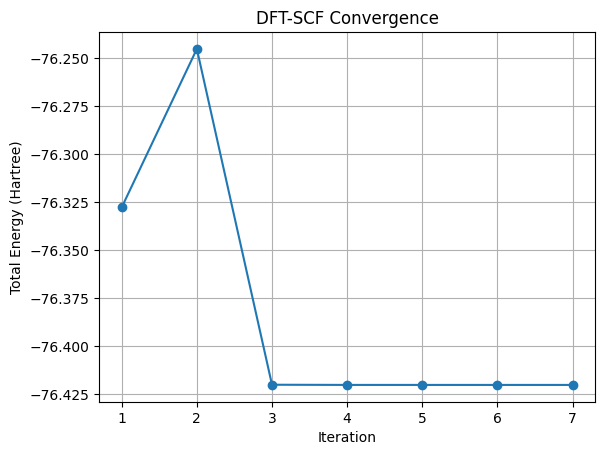

DFT energy for H2O using B3LYP: -76.42034892039445 Hartree


In [ ]:
# DFT-SCF (Kohn-Sham)

from pyscf import gto, dft
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define molecule using gto.M() function. Provide atomic positions in angstroms and basis set (here: cc-pvdz)
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'b3lyp'

# mf.kernel() function performs actual DFT calculation and returns energy
energy = mf.kernel()

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform DFT calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

print(f"DFT energy for H2O using B3LYP: {energy} Hartree")

### **DFT-SCF Kohn-Sham Hamiltonian**

In [ ]:
# Kohn-Sham Hamiltonian (First Quantization) includes exchange-correlation potential, which approximates exchange and correlation effects

from pyscf import gto, dft

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a DFT calculation using the B3LYP functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

# Get the Kohn-Sham Hamiltonian (core Hamiltonian + exchange-correlation potential)
ks_hamiltonian = mf.get_hcore() + mf.get_veff()

print("Kohn-Sham Hamiltonian matrix:\n", ks_hamiltonian)

converged SCF energy = -76.4203489203945
Kohn-Sham Hamiltonian matrix:
 [[-1.91216111e+01  4.06338633e+00 -3.69620322e+00 -7.19654917e-18
  -1.46887710e-16 -1.96943813e-02 -1.56289575e-18 -1.34007389e-17
  -3.88068587e-03  2.91989482e-18  2.26564373e-18 -1.88675866e-04
   6.73009248e-19  1.77075449e-03 -1.01666987e+00 -1.31698194e+00
  -7.45785539e-20  1.67398482e+00  1.29473947e+00 -1.01666987e+00
  -1.31698194e+00 -1.00866836e-18 -1.67398482e+00  1.29473947e+00]
 [ 4.06338633e+00 -1.45464084e+00 -1.11588848e-01 -8.19283592e-17
  -3.33587324e-16 -8.23131467e-02 -2.41138045e-17 -2.26901831e-16
  -6.58682120e-02 -6.43741631e-20  7.15573434e-18 -6.46016129e-03
  -2.95096349e-18  7.05463420e-02 -2.87959546e-01 -2.62222464e-01
   8.22474237e-18 -1.08702411e-02 -1.76931731e-02 -2.87959546e-01
  -2.62222464e-01 -3.20399132e-18  1.08702411e-02 -1.76931731e-02]
 [-3.69620322e+00 -1.11588848e-01 -1.47579592e+00 -1.09042081e-16
  -2.92821323e-16 -1.01216864e-01 -5.29949404e-17 -3.77475828e-16
  

In [ ]:
print("Kohn-Sham Hamiltonian Matrix Shape:", ks_hamiltonian.shape)
print("Kohn-Sham Hamiltonian Matrix Size:", ks_hamiltonian.size)
print("Kohn-Sham Hamiltonian Matrix Dimension:", ks_hamiltonian.ndim)
print("Kohn-Sham Hamiltonian Matrix Trace:", np.trace(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Determinant:", np.linalg.det(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Rank:", np.linalg.matrix_rank(ks_hamiltonian))

Kohn-Sham Hamiltonian Matrix Shape: (24, 24)
Kohn-Sham Hamiltonian Matrix Size: 576
Kohn-Sham Hamiltonian Matrix Dimension: 2
Kohn-Sham Hamiltonian Matrix Trace: -5.915010709150705
Kohn-Sham Hamiltonian Matrix Determinant: -0.0004599949515138757
Kohn-Sham Hamiltonian Matrix Rank: 24


The **Kohn-Sham Hamiltonian** matrix is central to Density Functional Theory (DFT), which is used for studying the electronic structure of many-body systems, such as atoms, molecules, and solids. The Kohn-Sham formalism transforms the complex many-electron problem into a simpler set of equations that describe non-interacting electrons, but in the **presence of an effective potential that accounts for the effects of electron-electron interactions**.

**Kohn-Sham Hamiltonian operator**

$
\hat{H}_{KS} = -\frac{1}{2} \nabla^2 + V_{ext}(\mathbf{r}) + V_H(\mathbf{r}) + V_{xc}(\mathbf{r})
$

1. $-\frac{1}{2} \nabla^2$ is the **kinetic energy** operator for non-interacting electrons.
2. $V_{ext}(\mathbf{r})$ is the **external potential**, usually the Coulomb potential due to the nuclei.
3. $V_H(\mathbf{r})$ is the **Hartree potential**, representing the electrostatic repulsion between electrons.
4. $V_{xc}(\mathbf{r})$ is the **exchange-correlation potential**, which accounts for the complex many-body interactions of electrons, beyond the simple electrostatic repulsion.

**Kohn-Sham Hamiltonian Matrix**

In practice, we discretize the Kohn-Sham Hamiltonian operator to work with it computationally, leading to the **Kohn-Sham Hamiltonian matrix**. This matrix depends on the basis set used to represent the wavefunctions, such as plane waves, Gaussian functions, or localized orbitals. Kohn-Sham matrix elements are given by:

$
H_{KS,ij} = \langle \phi_i | \hat{H}_{KS} | \phi_j \rangle
$

Where $ \phi_i $ and $ \phi_j $ are basis functions in the chosen representation. The diagonalization of this matrix yields the Kohn-Sham orbitals and their corresponding eigenvalues, which represent the electron energies in the effective potential.

**Key points:**
1. **Kinetic energy** is straightforward for non-interacting electrons.
2. **External potential** $V_{ext}(\mathbf{r})$ is usually the Coulomb interaction with the nuclei.
3. **Hartree potential** accounts for classical electron-electron repulsion.
4. **Exchange-correlation potential** captures the quantum mechanical effects of electron exchange and correlation, typically derived from an exchange-correlation functional.

Solving the Kohn-Sham equations involves iteratively updating the Hamiltonian and the electron density until self-consistency is reached, which then provides the ground state energy and electron density of the system.

### **DFT-SCF: Iteration through different molecules**

In [ ]:
from pyscf import gto, dft
import matplotlib.pyplot as plt

def run_dft_scf(atom_str, xc_functional='b3lyp', basis_set='cc-pvdz'):
    """
    Perform DFT-SCF calculation using a provided atom, functional, and basis set.

    Parameters:
    atom_str (str): Atomic structure in the format used by PySCF (e.g., 'O 0 0 0; H 0 0.757 0.586; H 0 -0.757 0.586').
    xc_functional (str): Exchange-correlation functional for DFT (default: 'b3lyp').
    basis_set (str): Basis set to be used (default: 'cc-pvdz').

    Returns:
    energy (float): Total energy from the DFT calculation.
    """
    # Step 1: Define molecule using provided atom positions and basis set
    mol = gto.M(
        atom=atom_str,
        basis=basis_set
    )

    # Step 2: Perform a DFT calculation with the specified functional
    mf = dft.RKS(mol)
    mf.xc = xc_functional

    # Store convergence data
    conv_data = []

    # Callback function to collect convergence information
    def callback(envs):
        conv_data.append(envs['e_tot'])

    # Set the callback to track SCF convergence
    mf.callback = callback

    # Perform the DFT calculation and get the total energy
    energy = mf.kernel()

    # Extract energy values and iteration numbers
    energies = conv_data
    iterations = range(1, len(energies) + 1)

    # Plot convergence
    plt.plot(iterations, energies, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Total Energy (Hartree)')
    plt.title(f'DFT-SCF Convergence ({xc_functional} functional, {basis_set} basis)')
    plt.grid(True)
    plt.show()

    return energy

def calculate_multiple_molecules(molecule_data):
    """
    Calculate DFT-SCF for multiple molecules using the provided data.

    Parameters:
    molecule_data (list of dict): Each dictionary contains 'atom_str', 'xc_functional', and 'basis_set' for a molecule.

    Returns:
    results (dict): A dictionary with molecule names as keys and total energies as values.
    """
    results = {}

    for mol_info in molecule_data:
        print(f"Calculating for {mol_info['name']}...")
        energy = run_dft_scf(mol_info['atom_str'], mol_info['xc_functional'], mol_info['basis_set'])
        results[mol_info['name']] = energy
        print(f"Total Energy for {mol_info['name']}: {energy} Hartree\n")

    return results

converged SCF energy = -76.4203489203945


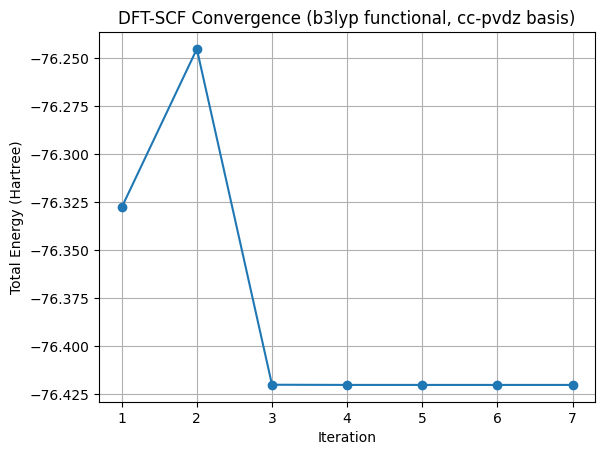

Total Energy: -76.42034892039455 Hartree


In [ ]:
# Example call to the function
atom_structure = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''

# Running with the default B3LYP functional and cc-pvdz basis set
total_energy = run_dft_scf(atom_str=atom_structure, xc_functional='b3lyp', basis_set='cc-pvdz')

print(f"Total Energy: {total_energy} Hartree")

Calculating for Water (H2O)...
converged SCF energy = -76.4203489203945


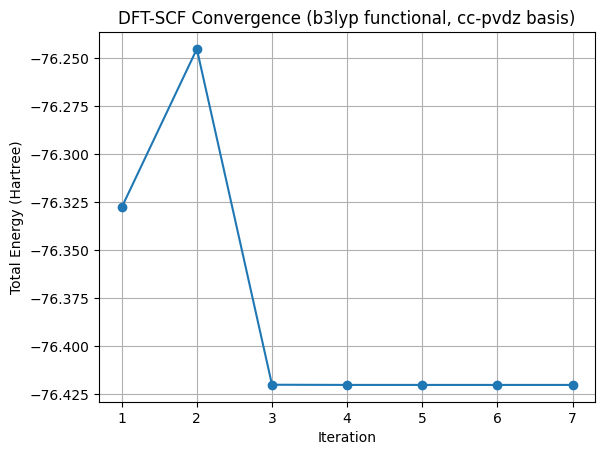

Total Energy for Water (H2O): -76.42034892039453 Hartree

Calculating for Benzene (C6H6)...
converged SCF energy = -232.262761777775


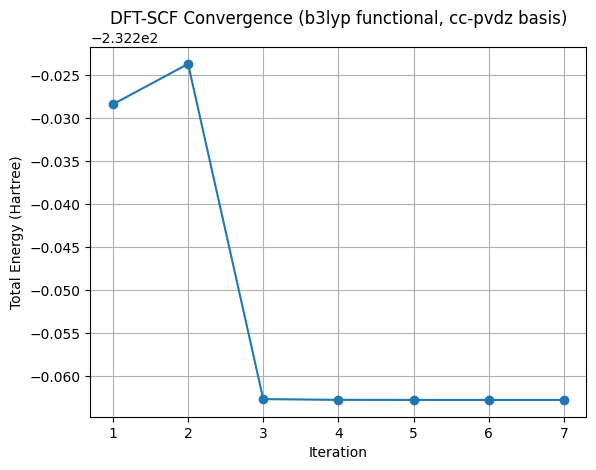

Total Energy for Benzene (C6H6): -232.26276177777493 Hartree

Calculating for Ammonia (NH3)...
converged SCF energy = -56.5342733560603


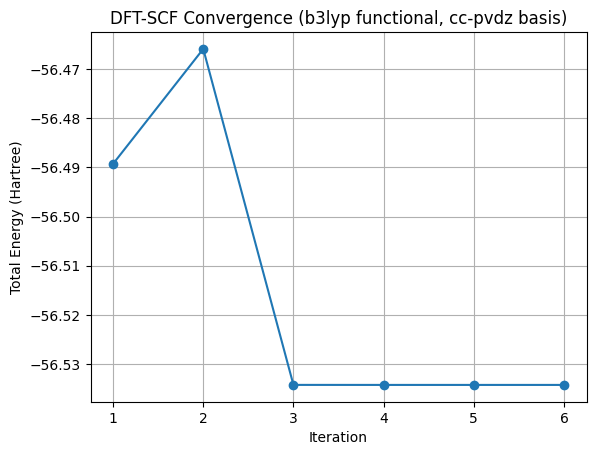

Total Energy for Ammonia (NH3): -56.534273356060325 Hartree

Water (H2O): -76.42034892039453 Hartree
Benzene (C6H6): -232.26276177777493 Hartree
Ammonia (NH3): -56.534273356060325 Hartree


In [ ]:
# Define molecular data for different molecules (water, benzene, and ammonia)
molecule_data = [
    {
        'name': 'Water (H2O)',
        'atom_str': '''
            O  0.000000  0.000000  0.000000
            H  0.000000  0.757000  0.586000
            H  0.000000 -0.757000  0.586000
        ''',
        'xc_functional': 'b3lyp',
        'basis_set': 'cc-pvdz'
    },
    {
        'name': 'Benzene (C6H6)',
        'atom_str': '''
            C   0.0000   1.4027   0.0000
            C  -1.2148   0.7014   0.0000
            C  -1.2148  -0.7014   0.0000
            C   0.0000  -1.4027   0.0000
            C   1.2148  -0.7014   0.0000
            C   1.2148   0.7014   0.0000
            H   0.0000   2.4900   0.0000
            H  -2.1567   1.2450   0.0000
            H  -2.1567  -1.2450   0.0000
            H   0.0000  -2.4900   0.0000
            H   2.1567  -1.2450   0.0000
            H   2.1567   1.2450   0.0000
        ''',
        'xc_functional': 'b3lyp',
        'basis_set': 'cc-pvdz'
    },
    {
        'name': 'Ammonia (NH3)',
        'atom_str': '''
            N  0.000000  0.000000  0.000000
            H  0.000000  0.000000  0.950000
            H  0.000000  0.824000 -0.475000
            H  0.000000 -0.824000 -0.475000
        ''',
        'xc_functional': 'b3lyp',
        'basis_set': 'cc-pvdz'
    }
]

# Calculate energies for all molecules
results = calculate_multiple_molecules(molecule_data)

# Display results
for molecule, energy in results.items():
    print(f"{molecule}: {energy} Hartree")

### **Coupled Cluster (CCSD)**

In [ ]:
# Coupled Cluster (CCSD)
from pyscf import gto, scf, cc
import matplotlib.pyplot as plt

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation to obtain the reference wavefunction
mf = scf.RHF(mol)
hf_energy = mf.kernel()

# Step 3: Perform a Coupled Cluster calculation (CCSD)
ccsd_calc = cc.CCSD(mf)
ccsd_energy = ccsd_calc.kernel()

# Step 4: (Optional) Include perturbative triple excitations (CCSD(T))
ccsd_t_energy = ccsd_calc.ccsd_t()

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
print(f"HF-SCF energy: {hf_energy} Hartree")
print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -76.026793644974


<class 'pyscf.cc.ccsd.CCSD'> does not have attributes  converged


E(CCSD) = -76.24008590505713  E_corr = -0.2132922600831529
CCSD(T) correction = -0.00305623252366073
HF-SCF energy: -76.02679364497398 Hartree
CCSD energy: (-0.21329226008315294, array([[ 6.33700540e-05, -1.88387857e-17,  7.49449454e-18,
        -4.61530990e-05,  7.38232263e-05,  2.27696076e-19,
        -1.34977983e-17,  9.21875410e-05, -2.81284683e-19,
        -2.53114688e-20, -1.86049592e-04,  7.81733517e-17,
        -4.84349686e-17,  8.64072851e-05, -4.44652851e-20,
        -1.22493022e-18, -5.75894137e-06,  3.23335360e-05,
        -5.84211067e-18],
       [-3.92795547e-03,  2.29860212e-15, -2.26821663e-15,
         4.88303304e-05, -4.23671800e-03,  1.54980970e-17,
         7.44052300e-16, -3.65269670e-04,  1.07228184e-17,
        -7.44056957e-18, -1.46663791e-03,  6.60406956e-17,
         7.05378766e-17,  2.67235113e-03, -1.40450894e-17,
        -3.64237525e-18, -1.02607422e-04,  9.09177381e-04,
        -2.45136973e-16],
       [-5.70377535e-17, -5.94309217e-03, -1.83314596e-03,
  

### **Møller-Plesset Perturbation Theory (MPn)**

In [ ]:
# Møller-Plesset Perturbation Theory (MPn)
from pyscf import gto, scf, mp

mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',
)
mf = scf.RHF(mol)
mf.kernel()

# MP2 single point energy calculation
mp2 = mp.MP2(mf)
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -76.0267936449738
E(MP2) = -76.2307620085712  E_corr = -0.20396836359741
E(SCS-MP2) = -76.226903584503  E_corr = -0.200109939529191
MP2 energy: -0.20396836359741044 Hartree


### **Geometry Optimization**

**Geometry Optimization (HF-SCF)** - adjusting the atomic positions to find a configuration with minimal energy

[Water molecule](https://en.m.wikipedia.org/wiki/Water) (H₂O) has a bent (or V-shaped) molecular geometry

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/H2O_2D_labelled.svg/320px-H2O_2D_labelled.svg.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1822.png)

In [ ]:
# Geometry Optimization (HF-SCF)
from pyscf import gto, scf, geomopt

# Step 1: Define the molecule
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',
)

# Step 2: Perform HF calculation with geometry optimization
mf = scf.RHF(mol)

# Geometry optimization
mol_eq = geomopt.optimize(mf)

print(f"Optimized geometry:\n{mol_eq.atom_coords()}")

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-46984e7b-02c9-42a3-86f4-cf31d6362241.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.757000   0.586000    0.000000  0.000000  0.000000
   H   0.000000  -0.757000   0.586000    0.000000  0.000000  0.000000
converged SCF energy = -76.0267936449738
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0143168421
1 H     0.0000000000     0.0100821479     0.0071584211
2 H    -0.0000000000    -0.0100821479     0.0071584211
----------------------------------------------
cycle 1: E = -76.026793645  dE = -76.0268  norm(grad) = 0.0225999


Step    0 : Gradient = 1.305e-02/1.432e-02 (rms/max) Energy = -76.0267936450
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.60000e-01 5.60557e-01 5.60557e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.003321   -0.000000 -0.000000  0.003321
   H  -0.000000   0.746102   0.584340   -0.000000 -0.010898 -0.001660
   H   0.000000  -0.746102   0.584340    0.000000  0.010898 -0.001660
converged SCF energy = -76.0270469068813
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0000755904
1 H     0.0000000000    -0.0012665893     0.0000377952
2 H    -0.0000000000     0.0012665893     0.0000377952
----------------------------------------------
cycle 2: E = -76.0270469069  dE = -0.000253262  norm(grad) = 0.00179362


Step    1 : Displace = 9.203e-03/1.102e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.036e-03/1.267e-03 (rms/max) E (change) = -76.0270469069 (-2.533e-04) Quality = 0.921
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.63126e-01 5.60557e-01 6.01174e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.005092   -0.000000 -0.000000  0.001771
   H  -0.000000   0.748968   0.583454   -0.000000  0.002866 -0.000886
   H   0.000000  -0.748968   0.583454    0.000000 -0.002866 -0.000886
converged SCF energy = -76.0270534782029
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000     0.0000785734
1 H     0.0000000000     0.0000518864    -0.0000392867
2 H     0.0000000000    -0.0000518864    -0.0000392867
----------------------------------------------
cycle 3: E = -76.0270534782  dE = -6.57132e-06  norm(grad) = 0.000121017


Step    2 : Displace = 2.654e-03/2.999e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 6.987e-05/7.857e-05 (rms/max) E (change) = -76.0270534782 (-6.571e-06) Quality = 0.931
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.75074e-01 5.60557e-01 5.98100e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.004935    0.000000 -0.000000 -0.000157
   H  -0.000000   0.748790   0.583533   -0.000000 -0.000177  0.000079
   H   0.000000  -0.748790   0.583533   -0.000000  0.000177  0.000079
converged SCF energy = -76.0270535127392
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000    -0.0000049496
1 H    -0.0000000000     0.0000021141     0.0000024748
2 H    -0.0000000000    -0.0000021141     0.0000024748
----------------------------------------------
cycle 4: E = -76.0270535127  dE = -3.45363e-08  norm(grad) = 6.75913e-06


Step    3 : Displace = 1.827e-04/1.941e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 3.902e-06/4.950e-06 (rms/max) E (change) = -76.0270535127 (-3.454e-08) Quality = 0.989
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.75074e-01 5.60557e-01 5.98100e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.395 seconds


Optimized geometry:
[[-2.06595741e-15 -6.06216733e-14  9.32501188e-03]
 [-3.41115931e-14  1.41500863e+00  1.10271700e+00]
 [ 3.61323290e-14 -1.41500863e+00  1.10271700e+00]]


**Geometry Optimization using DFT-SCF**

In [ ]:
from pyscf import gto, scf, geomopt
from pyscf import gto, dft
from pyscf.geomopt.geometric_solver import optimize


# Step 1: Define the molecule
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',
)

mol.basis = 'cc-pvdz'
mol.build()

# Perform geometry optimization using DFT
mf = dft.RKS(mol)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf) # This function iteratively adjusts positions of atoms to minimize total energy of system

# Print optimized coordinates. This geometry corresponds to lowest energy configuration found during optimization process
print("Optimized Geometry (in Angstroms):")
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-46984e7b-02c9-42a3-86f4-cf31d6362241.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.757000   0.586000    0.000000  0.000000  0.000000
   H   0.000000  -0.757000   0.586000    0.000000  0.000000  0.000000
converged SCF energy = -76.4203489203946
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000     0.0160000300
1 H     0.0000000000    -0.0069713070    -0.0080033176
2 H     0.0000000000     0.0069713070    -0.0080033176
----------------------------------------------
cycle 1: E = -76.4203489204  dE = -76.4203  norm(grad) = 0.0219387


Step    0 : Gradient = 1.267e-02/1.600e-02 (rms/max) Energy = -76.4203489204
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.60000e-01 5.60557e-01 5.60557e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000  -0.009850    0.000000  0.000000 -0.009850
   H   0.000000   0.757826   0.591030    0.000000  0.000826  0.005030
   H   0.000000  -0.757826   0.591030    0.000000 -0.000826  0.005030
converged SCF energy = -76.4206192746269
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000     0.0024621575
1 H     0.0000000000    -0.0005762021    -0.0012331412
2 H     0.0000000000     0.0005762021    -0.0012331412
----------------------------------------------
cycle 2: E = -76.4206192746  dE = -0.000270354  norm(grad) = 0.0031253


Step    1 : Displace = 7.047e-03/9.920e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 1.804e-03/2.462e-03 (rms/max) E (change) = -76.4206192746 (-2.704e-04) Quality = 1.142
Hessian Eigenvalues: 4.99999e-02 5.00000e-02 5.00000e-02 ... 1.45087e-01 5.25420e-01 5.60557e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.012486   -0.000000  0.000000 -0.002636
   H  -0.000000   0.756428   0.592426   -0.000000 -0.001398  0.001396
   H  -0.000000  -0.756428   0.592426   -0.000000  0.001398  0.001396
converged SCF energy = -76.4206270213167
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000     0.0000459714
1 H    -0.0000000000    -0.0001193929    -0.0000247331
2 H     0.0000000000     0.0001193929    -0.0000247331
----------------------------------------------
cycle 3: E = -76.4206270213  dE = -7.74669e-06  norm(grad) = 0.000178455


Step    2 : Displace = 2.217e-03/2.688e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 1.030e-04/1.219e-04 (rms/max) E (change) = -76.4206270213 (-7.747e-06) Quality = 0.984
Hessian Eigenvalues: 4.99973e-02 5.00000e-02 5.00000e-02 ... 1.57749e-01 4.91741e-01 5.60557e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.012346   -0.000000 -0.000000  0.000141
   H  -0.000000   0.756683   0.592411    0.000000  0.000255 -0.000015
   H  -0.000000  -0.756683   0.592411   -0.000000 -0.000255 -0.000015
converged SCF energy = -76.4206270677759
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000     0.0000000000    -0.0000081275
1 H     0.0000000000     0.0000105436     0.0000023007
2 H     0.0000000000    -0.0000105436     0.0000023007
----------------------------------------------
cycle 4: E = -76.4206270678  dE = -4.64591e-08  norm(grad) = 1.7291e-05


Step    3 : Displace = 2.208e-04/2.603e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 9.983e-06/1.079e-05 (rms/max) E (change) = -76.4206270678 (-4.646e-08) Quality = 0.916
Hessian Eigenvalues: 4.99973e-02 5.00000e-02 5.00000e-02 ... 1.57749e-01 4.91741e-01 5.60557e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 7.601 seconds


Optimized Geometry (in Angstroms):
[[-2.05823216e-14 -2.64962404e-14 -2.33303854e-02]
 [-7.90708925e-15  1.42992438e+00  1.11949400e+00]
 [-3.06772824e-14 -1.42992438e+00  1.11949400e+00]]


### **Fermionic (Molecular) Hamiltonian with Second Quantization**

In [ ]:
!pip install pyscf matplotlib openfermion openfermionpyscf -q

In [ ]:
# Fermionic (Molecular) Hamiltonian with Second Quantization
from pyscf import gto, scf, ao2mo
from openfermion import MolecularData, transforms
from openfermion.transforms import jordan_wigner
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import bravyi_kitaev

# Define molecule
geometry = [
    ('O', (0.0000000, 0.0000000, 0.0000000)),
    ('H', (0.7586022, 0.0000000, 0.5042847)),
    ('H', (-0.7586022, 0.0000000, 0.5042847))
]

basis = 'cc-pvdz' # Smaller basis set (e.g., sto-3g instead of cc-pvdz) to reduce the number of orbitals involved.
charge = 0
multiplicity = 1

# Create a MolecularData object
molecule = MolecularData(geometry, basis, multiplicity, charge)

# Perform a Hartree-Fock calculation
mol = gto.M(
    atom=geometry,
    basis=basis,
    charge=charge,
    spin=multiplicity - 1
)

mf = scf.RHF(mol)
mf.kernel()

# Number of electrons and orbitals for the molecule
num_electrons = mol.nelectron
num_orbitals = mf.mo_coeff.shape[1]

# Manually extract integrals from PySCF
h1 = mf.get_hcore()  # One-electron integrals
eri = ao2mo.kernel(mol, mf.mo_coeff)  # Two-electron integrals
nuclear_repulsion = mol.energy_nuc()

# Use OpenFermion to generate the molecular Hamiltonian
molecular_hamiltonian = generate_molecular_hamiltonian(
    geometry=geometry,
    basis=basis,
    multiplicity=multiplicity,
    charge=charge,
    n_active_electrons=num_electrons,
    n_active_orbitals=num_orbitals
)

# Get the Hamiltonian in second-quantized form
fermion_hamiltonian = transforms.get_fermion_operator(molecular_hamiltonian)

# Convert the fermionic Hamiltonian to a qubit Hamiltonian using Jordan-Wigner transformation
qubit_hamiltonian = jordan_wigner(fermion_hamiltonian)
# qubit_hamiltonian = bravyi_kitaev(fermion_hamiltonian) # To speed up: Convert to qubit Hamiltonian using Bravyi-Kitaev transform

# Print the qubit Hamiltonian
print("Qubit Hamiltonian (Jordan-Wigner):\n", qubit_hamiltonian)

**This can be computationally intensive because:**
* Number of Orbitals and Electrons: If your molecule has many orbitals (e.g., a large basis set) or electrons, the Hamiltonian will involve many terms. The Jordan-Wigner transformation processes each of these terms and converts them to qubit operators, which can take time.
* Two-Electron Integrals: These integrals contribute many terms to the Hamiltonian, and the mapping from fermions to qubits adds further complexity.

**To speed this up**:
* Try using a **smaller basis set** (e.g., sto-3g instead of cc-pvdz) to reduce the number of orbitals involved.
* **Active Space Approximation**: You can reduce the number of orbitals by focusing on an "active space" that includes only the most chemically relevant orbitals. For example, in OpenFermion-PySCF, you can define an active space of electrons and orbitals to restrict the number of orbitals used in the calculation.
* Use the **Bravyi-Kitaev transformation**: The Bravyi-Kitaev transformation may sometimes be faster and more efficient than the Jordan-Wigner transformation for certain systems, as it has better scaling for specific problem sizes.

**To speed up: Active Space Approximation and Smaller Basis Set**
* n_active_electrons = 4: Specifies the number of active electrons in the calculation. You can adjust this value based on your molecule's complexity and the level of approximation you're willing to make.
* n_active_orbitals = 6: Specifies the number of active orbitals, reducing the size of the problem.

In [ ]:
from pyscf import gto, scf, ao2mo
from openfermion import MolecularData, transforms
from openfermion.transforms import jordan_wigner
from openfermionpyscf import generate_molecular_hamiltonian

# Define the molecule
geometry = [
    ('O', (0.0000000, 0.0000000, 0.0000000)),
    ('H', (0.7586022, 0.0000000, 0.5042847)),
    ('H', (-0.7586022, 0.0000000, 0.5042847))
]
basis = 'sto-3g'  # Smaller basis set
charge = 0
multiplicity = 1

# Perform a Hartree-Fock calculation
mol = gto.M(
    atom=geometry,
    basis=basis,
    charge=charge,
    spin=multiplicity - 1
)

mf = scf.RHF(mol)
mf.kernel()

# Print the number of molecular orbitals and electrons
num_orbitals = mf.mo_coeff.shape[1]
num_electrons = mol.nelectron

print(f"Total number of orbitals: {num_orbitals}")
print(f"Total number of electrons: {num_electrons}")

# Set the active space (ensure these values are within the total available)
n_active_electrons = min(4, num_electrons)  # Adjust to be <= total number of electrons
n_active_orbitals = min(4, num_orbitals)    # Adjust to be <= total number of orbitals

# Use OpenFermion-PySCF to generate the molecular Hamiltonian with the active space
molecular_hamiltonian = generate_molecular_hamiltonian(
    geometry=geometry,
    basis=basis,
    multiplicity=multiplicity,
    charge=charge,
    n_active_electrons=n_active_electrons,
    n_active_orbitals=n_active_orbitals
)

# Get the Hamiltonian in second-quantized form
fermion_hamiltonian = transforms.get_fermion_operator(molecular_hamiltonian)

# Convert the fermionic Hamiltonian to a qubit Hamiltonian using Jordan-Wigner transformation
qubit_hamiltonian = jordan_wigner(fermion_hamiltonian)

# Print the qubit Hamiltonian
print("Qubit Hamiltonian (Jordan-Wigner):\n", qubit_hamiltonian)

### **Quantum Computing for Ground-state energy estimation**

[IonQ: Ground-state energy estimation of the water molecule on a trapped ion quantum computer](https://ionq.com/links/Water_Molecule_VQE_Simulation.pdf)

https://pennylane.ai/qml/demos/tutorial_quantum_chemistry/

In [ ]:
# Quantum Computing for Ground-state energy estimation
# Variational Quantum Eigensolver

!pip install pennylane -q

import pennylane as qml
from pennylane import numpy as np

# Define the molecular system
symbols = ['O', 'H', 'H']
# The coordinates should be provided in atomic units (Bohr)
coordinates = np.array([0.0, 0.0, 0.0, 1.432, 1.107, 0.0, -1.432, 1.107, 0.0])  # Approximate atomic units

# Generate the molecular Hamiltonian using PennyLane's quantum chemistry module
H, qubits = qml.qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=0,
    mult=1,  # Singlet state
    basis='sto-3g',  # Simple minimal basis set
    active_electrons=4,  # 2 electrons from hydrogen and 2 from oxygen (for a minimal example)
    active_orbitals=4,  # Adjust as needed for accuracy
    mapping='jordan_wigner'  # Fermion-to-qubit mapping
)

# Define the quantum device
dev = qml.device('default.qubit', wires=qubits)

# Define the ansatz (parameterized quantum circuit)
def ansatz(params):
    for i in range(qubits):
        qml.RY(params[i], wires=i)
    for i in range(qubits - 1):
        qml.CNOT(wires=[i, i + 1])

# Define the cost function (expectation value of the Hamiltonian)
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params)
    return qml.expval(H)

# Perform the VQE optimization
optimizer = qml.GradientDescentOptimizer(stepsize=0.1)
params = np.random.randn(qubits)
for i in range(100):
    params = optimizer.step(cost_fn, params)

# Extract the ground state energy
ground_state_energy = cost_fn(params)

print("Ground state energy of H2O molecule:", ground_state_energy)

Ground state energy of H2O molecule: -73.8199543781253


In your quantum algorithm to compute the ground state energy of the water molecule using the Variational Quantum Eigensolver (VQE), the number of qubits required depends on the number of active orbitals and the fermion-to-qubit mapping used.

**How the Number of Qubits is Determined:**
- **Active orbitals:** In your example, you have specified `active_orbitals=4`. This means you're choosing 4 molecular orbitals to describe the electronic structure of the water molecule.
- **Qubit mapping (Jordan-Wigner transformation):** This transformation maps each spin-orbital to one qubit. For each active orbital, there are two spin states (spin-up and spin-down), so you need \( 2 \times \text{{active orbitals}} \) qubits.

Thus, for your setup:
$
\text{{Number of qubits}} = 2 \times \text{{active orbitals}} = 2 \times 4 = 8 \, \text{{qubits}}.
$

Therefore, you are using **8 qubits** in this quantum algorithm for the water molecule. This is determined by the 4 active orbitals, where each orbital has two spin states (requiring two qubits per orbital) under the Jordan-Wigner mapping.